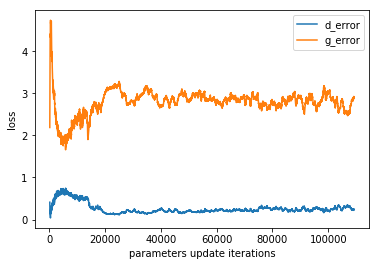

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

# Plot the loss
log_df = pd.read_csv('logs/loss.log', sep=',')

ax = log_df['d_error'].rolling(150).mean().plot(legend=True)
log_df['g_error'].rolling(150).mean().plot(ax=ax, legend=True)
ax.set_ylabel('loss')
ax.set_xlabel('parameters update iterations');

In [4]:
import torch
import torchvision.utils as vutils

def denormalize(img):
    max_val = np.max(img)
    min_val = np.min(img)
    return (img - min_val) / (max_val - min_val)

# Plot a few images sampled from the generator
n_list = [200,300,400,500]

digit = 9
for n in n_list:
    fn = 'img/generated_img.{}.epoch{}.npy'.format(digit, n)
    test_images = np.load(fn)
    vutils.save_image(torch.from_numpy(denormalize(test_images)), 'img/fake_img.dcgan.{}.epoch.{}.png'.format(digit, n))    